In [1]:
import pandas as pd
import numpy as np

df_true = pd.read_csv('True.csv').drop(columns=['date'])
df_fake = pd.read_csv('Fake.csv').drop(columns=['date'])

In [2]:
print(df_true.shape)
df_true.head()

(21417, 3)


,title,text,subject
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews


In [3]:
print(df_fake.shape)
df_fake.head()

(23481, 3)


,title,text,subject
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News


In [4]:
def wordcount(dataframe, column):
    lst=[]
    for a in dataframe[column]:
        lst.append(len(a.split(' ')))
    dataframe[f'word_count_{column}'] = lst
wordcount(df_true, 'title')
wordcount(df_true, 'text')
wordcount(df_fake, 'title')
wordcount(df_fake, 'text')

In [5]:
def create_corpus(dataframe):
    corpus=[]
    for i in dataframe['text']:
        corpus.append(i)
    return corpus

In [6]:
df_true['real'] = 1
df_fake['real'] = 0
df_combined = pd.concat([df_true,df_fake],ignore_index=True)

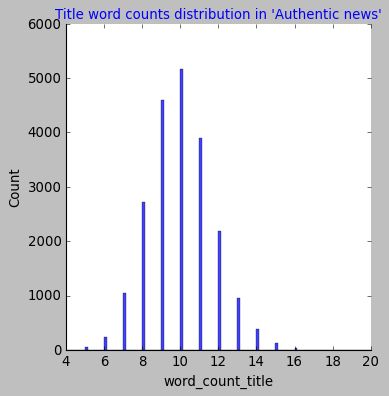

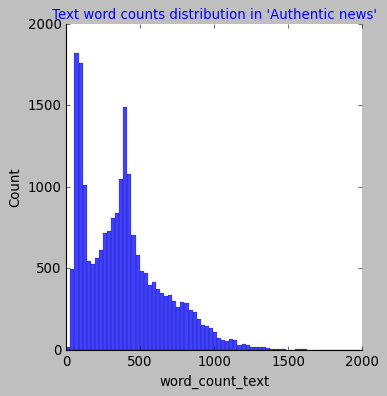

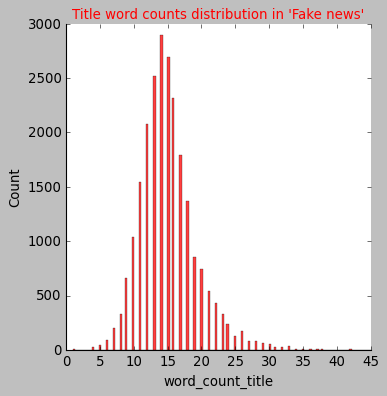

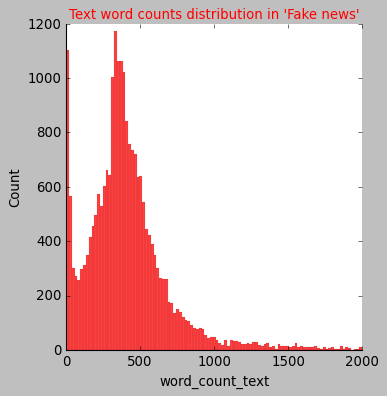

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("classic")
sns.displot(df_true['word_count_title'],color='b')
plt.title("Title word counts distribution in 'Authentic news'", fontsize=12, color = 'b')
plt.show()

sns.displot(df_true['word_count_text'],color='b')
plt.title("Text word counts distribution in 'Authentic news'", fontsize=12, color = 'b')
plt.xlim(0,2000)
plt.show()

sns.displot(df_fake['word_count_title'],color='r')
plt.title("Title word counts distribution in 'Fake news'", fontsize=12, color = 'r')
plt.show()

sns.displot(df_fake['word_count_text'],color='r')
plt.title("Text word counts distribution in 'Fake news'", fontsize=12, color = 'r')
plt.xlim(0,2000)
plt.show()

In [8]:
print('Mean words in title for true articles:',df_true['word_count_title'].mean())
print('Mean words in text for true articles:',df_true['word_count_text'].mean())
print('Mean words in title for fake articles:',df_fake['word_count_title'].mean())
print('Mean words in text for fake articles:',df_fake['word_count_text'].mean())

print('Median words in title for true articles:',df_true['word_count_title'].median())
print('Median words in text for true articles:',df_true['word_count_text'].median())
print('Median words in title for fake articles:',df_fake['word_count_title'].median())
print('Median words in text for fake articles:',df_fake['word_count_text'].median())

print('Std words in title for true articles:',df_true['word_count_title'].std())
print('Std words in text for true articles:',df_true['word_count_text'].std())
print('Std words in title for fake articles:',df_fake['word_count_title'].std())
print('Std words in text for fake articles:',df_fake['word_count_text'].std())

Mean words in title for true articles: 9.958864453471541
Mean words in text for true articles: 394.4065928934958
Mean words in title for fake articles: 15.11843618244538
Mean words in text for fake articles: 435.23721306588305
Median words in title for true articles: 10.0
Median words in text for true articles: 367.0
Median words in title for fake articles: 15.0
Median words in text for fake articles: 373.0
Std words in title for true articles: 1.7024773691174313
Std words in text for true articles: 281.0623347574148
Std words in title for fake articles: 4.23302114503765
Std words in text for fake articles: 420.99874480966287


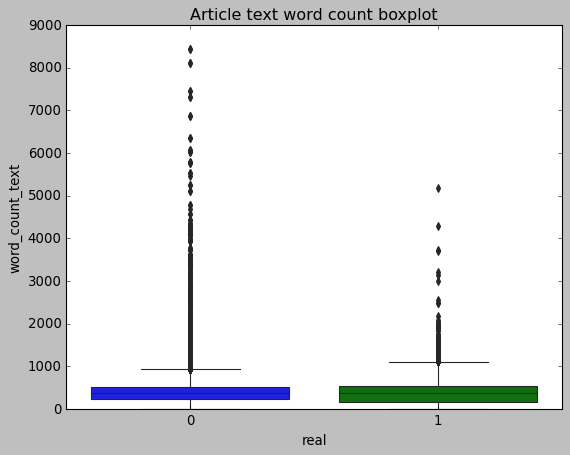

In [9]:
plt.title('Article text word count boxplot')
sns.boxplot(x="real",y='word_count_text',data=df_combined)
plt.show()

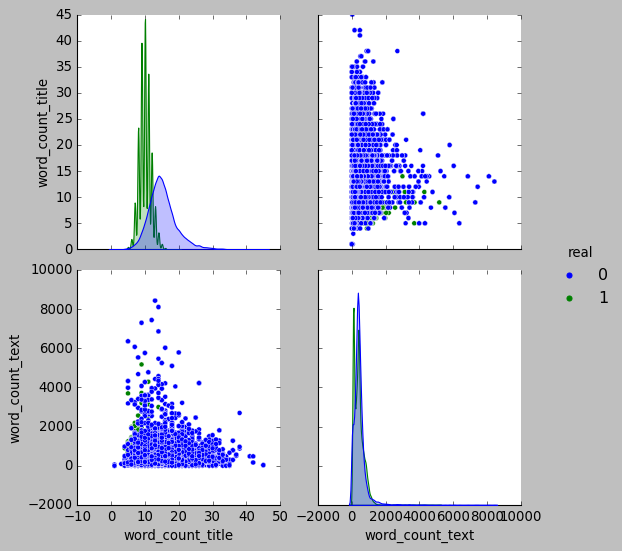

In [10]:
sns.pairplot(data=df_combined,hue='real',height=3.5)
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

corpus = create_corpus(df_combined)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
print("sample feature names:",feature_names[1500:1521])
print(X.shape)

sample feature names: ['1992enforcement', '1992the', '1993', '1993from', '1993the', '1993vince', '1993was', '1994', '1994i', '1994president', '1994represented', '1994see', '1995', '1995republicans', '1996', '1996jonben', '1997', '1997hud', '1998', '19984125205', '1998by']
(44898, 121690)


/Users/matthewtung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
Y = df_combined.iloc[:,-1]

In [16]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_curve, auc
def print_results(model, x_test_, y_test_):
    print('=====================Analytics for',model,'=============================')
    y_pred_test_ = model.predict(x_test_)
    cm = confusion_matrix(y_test_,y_pred_test_)
    precision_scr = round(precision_score(y_test_, y_pred_test_),3)
    accuracy_scr = round(accuracy_score(y_test_, y_pred_test_),3)
    recall_scr = round(recall_score(y_test_, y_pred_test_),3)
    f1_scr = round(f1_score(y_test_, y_pred_test_),3)
    
    print('Precision score is',precision_scr)
    print('Accuracy score is',accuracy_scr)
    print('Recall score is',recall_scr)
    print('F1 score is',f1_scr)
    print('Confusion matrix:')
    cm_display = ConfusionMatrixDisplay(cm).plot()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
# trying different models

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42,penalty='l1',solver='liblinear').fit(x_train, y_train)

=====================Analytics for LogisticRegression(penalty='l1', random_state=42, solver='liblinear') =============================
Precision score is 0.99
Accuracy score is 0.993
Recall score is 0.995
F1 score is 0.993
Confusion matrix:


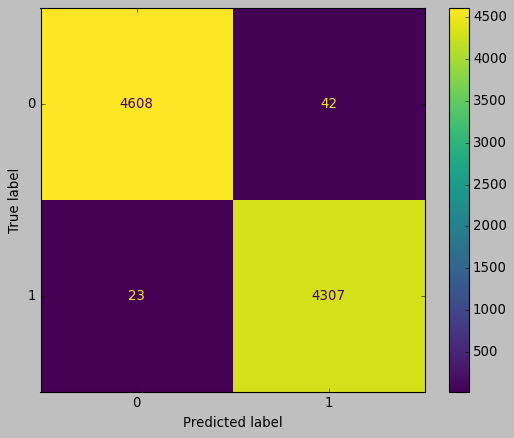

In [17]:
lr.score(x_test, y_test)
print_results(lr,x_test,y_test)

=====================Analytics for LogisticRegression(random_state=42) =============================
Precision score is 0.983
Accuracy score is 0.987
Recall score is 0.99
F1 score is 0.987
Confusion matrix:


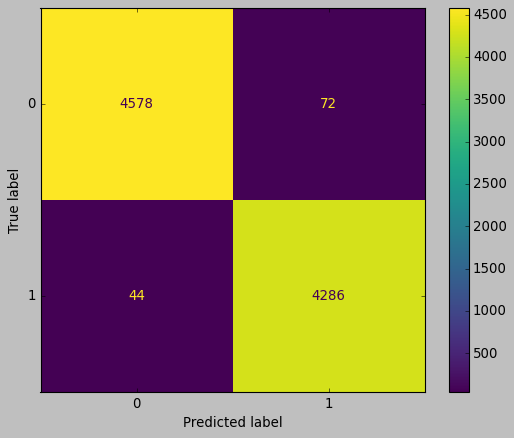

In [18]:
lr2 = LogisticRegression(random_state=42,penalty='l2').fit(x_train, y_train)
lr2.score(x_test, y_test)
print_results(lr2,x_test,y_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=42).fit(x_train, y_train)

=====================Analytics for RandomForestClassifier(max_depth=5, random_state=42) =============================
Precision score is 0.984
Accuracy score is 0.936
Recall score is 0.882
F1 score is 0.93
Confusion matrix:


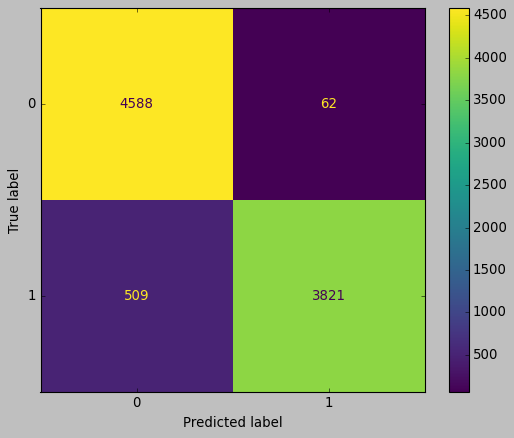

In [20]:
rf.score(x_test, y_test)
print_results(rf,x_test,y_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
knn.score(x_test, y_test)

0.5910913140311804

In [ ]:
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB().fit(x_train, y_train)

In [24]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=42, tol=1e-5).fit(x_train, y_train)

=====================Analytics for LinearSVC(random_state=42, tol=1e-05) =============================
Precision score is 0.994
Accuracy score is 0.994
Recall score is 0.995
F1 score is 0.994
Confusion matrix:


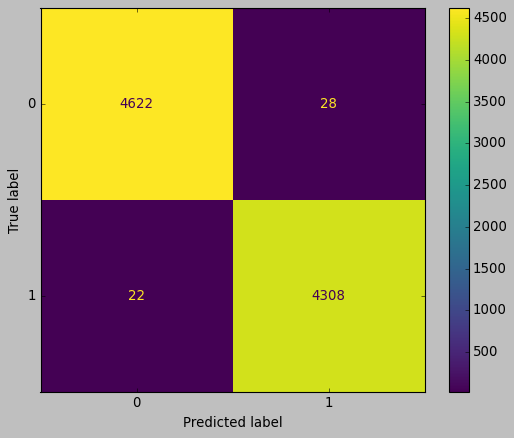

In [25]:
lsvc.score(x_test, y_test)
print_results(lsvc,x_test,y_test)

In [ ]:
# dictionary of which word is mapped to which feature number
#vectorizer.vocabulary_

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate("".join(df_true.title))
plt.axis("off")
plt.title("Frequent words in 'Authentic news' title")
plt.imshow(wordcloud)

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate("".join(df_true.text))
plt.axis("off")
plt.title("Frequent words in 'Authentic news' text")
plt.imshow(wordcloud)

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate("".join(df_fake.title))
plt.axis("off")
plt.title("Frequent words in 'Fake news' title")
plt.imshow(wordcloud)

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate("".join(df_fake.text))
plt.axis("off")
plt.title("Frequent words in 'Fake news' text")
plt.imshow(wordcloud)